In [1]:
#update scikit-learn
!pip uninstall scikit-learn -y
!pip install scikit-learn
!pip install scikit-multilearn
!pip install iterative-stratification
!pip install sklearn-contrib-lightning
!pip install --upgrade numpy

Found existing installation: scikit-learn 1.0.1
Uninstalling scikit-learn-1.0.1:
  Successfully uninstalled scikit-learn-1.0.1
     |████████████████████████████████| 23.2 MB 1.8 MB/s 
     |████████████████████████████████| 89 kB 3.9 MB/s 
     |████████████████████████████████| 3.4 MB 5.4 MB/s 
     |████████████████████████████████| 15.7 MB 5.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
# Load Data
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

url = 'https://raw.githubusercontent.com/nasa-petal/search-engine/main/golden.json'
df = pd.read_json(url, orient='columns')
df.head()

,paper,mag,venue_mag,author,reference,title,abstract,petalID,doi,venue,level1,level2,level3,url,isBiomimicry,fullDocLink,isOpenAccess,abstract_full,title_full
0,2103410568,"['bubble nest', 'nest', 'mixing', 'bubble', 'phase', 'engystomops pustulosus', 'deposition', 'three phase', 'composite material', 'ecology', 'biol...",['Biology Letters'],"[2346835213, 2098042950]","[2130285640, 2066345165, 2054319467, 2047714064, 2038086748, 2146144564, 2271809641, 2083811528, 2159311519, 1991801038, 2101222182, 1794681095]","['building', 'home', 'foam', 'tungara', 'frog', 'foam', 'nest', 'architecture', 'three', 'phase', 'construction', 'process']","['frogs', 'build', 'foam', 'nests', 'floating', 'water', 'face', 'problems', 'over', 'dispersion', 'secretions', 'eggs', 'dangerously', 'exposed',...",0,10.1098/RSBL.2009.0934,"[""Weird Nature: An Astonishing Exploration of Nature's Strangest Behavior"", 'Proceedings of The Royal Society B: Biological Sciences', 'Biology Le...","['physically_assemble/disassemble', 'protect_from_harm']","['physically_assemble_structure', 'protect_from_living_threats', 'protect_from_non-living_threats']","['protect_from_animals', 'protect_from_loss_of_liquids', 'protect_from_microbes']",https://royalsocietypublishing.org/doi/10.1098/rsbl.2009.0934,Y,https://royalsocietypublishing.org/doi/10.1098/rsbl.2009.0934,True,Frogs that build foam nests floating on water face the problems of over-dispersion of the secretions used and eggs being dangerously exposed at th...,Building a home from foam—túngara frog foam nest architecture and three-phase construction process
1,2138292607,"['sunset', 'earth s magnetic field', 'compass', 'nocturnal', 'myotis myotis', 'sunrise', 'mammal', 'clockwise', 'geodesy', 'ecology', 'biology']",['Proceedings of the National Academy of Sciences of the United States of America'],"[2132083079, 2425702268, 2552946098]","[1493129647, 2037761037, 1984592609, 2136994271, 598168241, 2074763520, 2015670290, 1972968179, 2082135766, 1989762226, 2014046631, 2154337160, 21...","['nocturnal', 'mammal', 'greater', 'mouse', 'eared', 'bat', 'calibrates', 'magnetic', 'compass', 'sun']","['evidence', 'suggests', 'bats', 'detect', 'geomagnetic', 'field', 'way', 'navigation', 'home', 'roost', 'remains', 'unresolved', 'may', 'animals'...",1,10.1073/PNAS.0912477107,['Proceedings of the National Academy of Sciences of the United States of America'],['sense_send_or_process_information'],['sense_signals/environmental_cues'],['sense_spatial_awareness/balance/orientation'],https://www.pnas.org/content/107/15/6941,Y,https://www.pnas.org/content/107/15/6941.full.pdf,True,"Recent evidence suggests that bats can detect the geomagnetic field, but the way in which this is used by them for navigation to a home roost rema...","A nocturnal mammal, the greater mouse-eared bat, calibrates a magnetic compass by the sun"
2,2005539166,"['sepia mestus', 'optomotor response', 'cuttlefish', 'stimulus', 'optics', 'biology', 'sepia plangon']",['The Journal of Experimental Biology'],"[2163942483, 3088803717]","[2035108601, 2155571491, 2159857711, 2075218762, 1512876644, 2116757253, 1975945149, 1572615739, 2142128649, 2145939631, 2039012144, 1913099556, 2...","['polarization', 'sensitivity', 'two', 'species', 'cuttlefish', 'sepia', 'plangon', 'gray', '1849', 'sepia', 'mestus', 'gray', '1849', 'demonstrat...","['existence', 'polarization', 'sensitivity', 'ps', 'likely', 'resulting', 'orthogonal', 'arrangement', 'microvilli', 'photoreceptors', 'cephalopod...",2,10.1242/JEB.042937,"['The Journal of Experimental Biology', 'Current Biology']",['sense_send_or_process_information'],['sense_signals/environmental_cues'],"['sense_light_in_the_non-visible_spectrum', 'sense_light_in_the_visible_spectrum']",https://jeb.biologists.org/content/213/19/3364,Y,https://journals.biologists.com/jeb/article-pdf/213/19/3364/1270742/3364.pdf,True,"SUMMARY The existence of polarization sensitivity (PS), most likely resulting from the orthogonal arrangement of mic

In [117]:
# Drop all non-feature columns
non_feat = ['paper', 'title', 'abstract', 'petalID', 'doi', 'url', 'fullDocLink', 'isOpenAccess']
#non_feat = ['paper', 'title', 'abstract', 'petalID', 'doi', 'level2', 'level3', 'url', 'isBiomimicry', 'fullDocLink', 'isOpenAccess']
df.drop(non_feat, axis=1, inplace=True)
df.head()

,mag,venue_mag,author,reference,venue,level1,level2,level3,isBiomimicry,abstract_full,title_full
0,"['bubble nest', 'nest', 'mixing', 'bubble', 'phase', 'engystomops pustulosus', 'deposition', 'three phase', 'composite material', 'ecology', 'biol...",['Biology Letters'],"[2346835213, 2098042950]","[2130285640, 2066345165, 2054319467, 2047714064, 2038086748, 2146144564, 2271809641, 2083811528, 2159311519, 1991801038, 2101222182, 1794681095]","[""Weird Nature: An Astonishing Exploration of Nature's Strangest Behavior"", 'Proceedings of The Royal Society B: Biological Sciences', 'Biology Le...","['physically_assemble/disassemble', 'protect_from_harm']","['physically_assemble_structure', 'protect_from_living_threats', 'protect_from_non-living_threats']","['protect_from_animals', 'protect_from_loss_of_liquids', 'protect_from_microbes']",Y,Frogs that build foam nests floating on water face the problems of over-dispersion of the secretions used and eggs being dangerously exposed at th...,Building a home from foam—túngara frog foam nest architecture and three-phase construction process
1,"['sunset', 'earth s magnetic field', 'compass', 'nocturnal', 'myotis myotis', 'sunrise', 'mammal', 'clockwise', 'geodesy', 'ecology', 'biology']",['Proceedings of the National Academy of Sciences of the United States of America'],"[2132083079, 2425702268, 2552946098]","[1493129647, 2037761037, 1984592609, 2136994271, 598168241, 2074763520, 2015670290, 1972968179, 2082135766, 1989762226, 2014046631, 2154337160, 21...",['Proceedings of the National Academy of Sciences of the United States of America'],['sense_send_or_process_information'],['sense_signals/environmental_cues'],['sense_spatial_awareness/balance/orientation'],Y,"Recent evidence suggests that bats can detect the geomagnetic field, but the way in which this is used by them for navigation to a home roost rema...","A nocturnal mammal, the greater mouse-eared bat, calibrates a magnetic compass by the sun"
2,"['sepia mestus', 'optomotor response', 'cuttlefish', 'stimulus', 'optics', 'biology', 'sepia plangon']",['The Journal of Experimental Biology'],"[2163942483, 3088803717]","[2035108601, 2155571491, 2159857711, 2075218762, 1512876644, 2116757253, 1975945149, 1572615739, 2142128649, 2145939631, 2039012144, 1913099556, 2...","['The Journal of Experimental Biology', 'Current Biology']",['sense_send_or_process_information'],['sense_signals/environmental_cues'],"['sense_light_in_the_non-visible_spectrum', 'sense_light_in_the_visible_spectrum']",Y,"SUMMARY The existence of polarization sensitivity (PS), most likely resulting from the orthogonal arrangement of microvilli in photoreceptors, has...",Polarization sensitivity in two species of cuttlefish – Sepia plangon (Gray 1849) and Sepia mestus (Gray 1849) – demonstrated with polarized optom...
3,"['energy source', 'cellulase', 'archaea', 'cellulose', 'carbon', 'microorganism', 'chemical engineering', 'biochemistry', 'characterization', 'bio...",['Nature Communications'],"[3146712807, 3146712807, 2189911855, 2659069087, 2041875485, 1908622077, 2400232562, 2177715791, 2137373563, 2074622680, 2074622680]","[2141885858, 2120772351, 2108929776, 2120244994, 2106246537, 2146341019, 2162595238, 2140244239, 2113253983, 2156563976, 2143926699, 2086800637, 1...",['Nature Communications'],"['chemically_modify_or_change_energy_state', 'protect_from_harm']","['chemically_break_down', 'protect_from_non-living_threats']","['chemically_break_down_organic_compounds', 'protect_from_temperature']",Y,"Despite extensive studies on microbial and enzymatic lignocellulose degradation, relatively few Archaea are known to deconstruct crystalline cellu...",Identification and characterization of a multidomain hyperthermophilic cellulase from an archaeal enrichment.
4,"['galactan', 'coralline algae', 'cell wall', 'polysaccharide', 'stereochemistry', 'botany', 'biology', 'calliarthron cheilosporioides', 'structura...",['Journal of Phycology'],"[1790079306, 2557664461, 189902495,

In [5]:
# Preliminary exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mag            11084 non-null  object
 1   venue_mag      11084 non-null  object
 2   author         11084 non-null  object
 3   reference      11084 non-null  object
 4   venue          11084 non-null  object
 5   level1         11084 non-null  object
 6   level2         11084 non-null  object
 7   level3         11084 non-null  object
 8   isBiomimicry   11084 non-null  object
 9   abstract_full  11065 non-null  object
 10  title_full     11084 non-null  object
dtypes: object(11)
memory usage: 952.7+ KB


In [6]:
print(df[df['title_full'] != ''].shape)
print(df[df['title_full'] != '[]'].shape)
print(df[df['title_full'] != "['']"].shape)

print(df[df['mag'] != ''].shape)
print(df[df['mag'] != '[]'].shape)
print(df[df['mag'] != "['']"].shape)

print(df[df['venue_mag'] != ''].shape)
print(df[df['venue_mag'] != '[]'].shape)
print(df[df['venue_mag'] != "['']"].shape)

print(df[df['author'] != ''].shape)
print(df[df['author'] != '[]'].shape)
print(df[df['author'] != "['']"].shape)

print(df[df['reference'] != ''].shape)
print(df[df['reference'] != '[]'].shape)
print(df[df['reference'] != "['']"].shape)

print(df[df['venue'] != ''].shape)
print(df[df['venue'] != '[]'].shape)
print(df[df['venue'] != "['']"].shape)

print(df[df['level1'] != ''].shape)
print(df[df['level1'] != '[]'].shape)
print(df[df['level1'] != "['']"].shape)

print(df[df['level2'] != ''].shape)
print(df[df['level2'] != '[]'].shape)
print(df[df['level2'] != "['']"].shape)

print(df[df['level3'] != ''].shape)
print(df[df['level3'] != '[]'].shape)
print(df[df['level3'] != "['']"].shape)

(11013, 11)
(11084, 11)
(11084, 11)
(11084, 11)
(1432, 11)
(11084, 11)
(11084, 11)
(1429, 11)
(11084, 11)
(11084, 11)
(1432, 11)
(11084, 11)
(11084, 11)
(1369, 11)
(11084, 11)
(11084, 11)
(10725, 11)
(11084, 11)
(11084, 11)
(1132, 11)
(11084, 11)
(11084, 11)
(1127, 11)
(11084, 11)
(11084, 11)
(1045, 11)
(11084, 11)


In [118]:
# Clean data

# remove rows with no level1 labels, or no titles
df = df[df['title_full'] != '']
#df = df[df['level1'] != '[]']
#df = df[df['level2'] != '[]']

# remap level1 labels
df.level1.replace({'physically_assemble/disassemble':'physically_assemble_or_disassemble',
                    'sense,_send,_or_process_information':'sense_send_or_process_information',
                    'maintain_ecological_community':'sustain_ecological_community',
                    'manipulate_solids,_liquids,_gases,_or_energy':'manipulate_solids_liquids_gases_or_energy'}, regex=True, inplace=True)

# remap level3 labels
df.level3.replace({'manage_environmental_disturbances_in_a_community':'manage_environmental_disturbances',
                   "'move_through_gases', ?":'',
                   "'move_through\/on_liquids', ?":'',
                   "'move_through\/on_solids', ?":''}, regex=True, inplace=True)

df.level3.replace({", ?'move_through_gases'":'',
                   ", ?'move_through\/on_liquids'":'',
                   ", ?'move_through\/on_solids'":''}, regex=True, inplace=True)

df.level3.replace({"'move_through_gases'":'',
                   "'move_through\/on_liquids'":'',
                   "'move_through\/on_solids'":''}, regex=True, inplace=True)

'''

,
                   ",\s*'move_through_gases'":'',
                   "\[\s*'move_through/on_liquids',\s*":'',
                   ",\s*'move_through/on_liquids'":'',
                   "\[\s*'move_through/on_solids',\s*":'',
                   ",\s*'move_through/on_solids'":''

# turn labels into integers and store in level1_num
df['level1_num'] = df['level1']

label_to_num = {'physically_assemble_or_disassemble': '1',
                'protect_from_harm': '2',
                'sense_send_or_process_information': '3',
                'chemically_modify_or_change_energy_state': '4',
                'maintain_structural_integrity': '5',
                'attach': '6',
                'move': '7',
                'process_resources': '8',
                'sustain_ecological_community': '9',
                'change_size_or_color': '10',
                'manipulate_solids_liquids_gases_or_energy': '11'}

df.level1_num.replace(label_to_num, regex=True, inplace=True)

# convert integer strings to ints
df.level1_num.replace({"'": '', '"': ''}, regex=True, inplace=True)

# store papers with no level 1 labels (ie non-biomimicry papers) as class 0.
df['level1_num'] = df['level1_num'].str.replace(r"\[\]","[0]")
'''

# convert array strings to actual arrays
from ast import literal_eval
df['level1'] = df['level1'].apply(literal_eval)
df['level2'] = df['level2'].apply(literal_eval)
df['level3'] = df['level3'].apply(literal_eval)
#df['level1_num'] = df['level1_num'].apply(literal_eval)
df.shape

(11013, 11)

In [120]:
# show unique level1 leaf labels in the dataset
from itertools import chain

df1 = df[(df.level1.str.len().gt(0)) & (df.level2.str.len().eq(0))]

unique_lists_in_items1 = df1.level1
set_of_items1 = set(chain(*unique_lists_in_items1))
print('Level 1 leaf labels')
print(set_of_items1)

# show unique level1 labels in the dataset
unique_lists_in_items1b = df.level1
set_of_items1b = set(chain(*unique_lists_in_items1b))
print('Level 1 labels')
print(set_of_items1b)

# show unique level2 leaf labels in the dataset
from itertools import chain

df2 = df[(df.level2.str.len().gt(0)) & (df.level3.str.len().eq(0))]

unique_lists_in_items2 = df2.level2
set_of_items2 = set(chain(*unique_lists_in_items2))
print('Level 2 leaf labels')
print(set_of_items2)

#leaves = ['detox/purify']
# leaves detox/purify

# show unique level3 labels in the dataset
unique_lists_in_items3 = df.level3
set_of_items3 = set(chain(*unique_lists_in_items3))
print('Level 3 labels')
print(set_of_items3)

# Check to see if there is any overlap in the level 1 and level 2 labels.
overlap = False

for label in set_of_items1:
  if label in set_of_items2:
    print(label)
    overlap = True

if not overlap:
  print('level1 and level2 labels are unique.')

# Check to see if there is any overlap in the level 1 and level 3 labels.
overlap = False

for label in set_of_items1:
  if label in set_of_items3:
    print(label)
    overlap = True

if not overlap:
  print('level1 and level3 labels are unique.')

# Check to see if there is any overlap in the level 2 and level 3 labels.
overlap = False

for label in set_of_items2:
  if label in set_of_items3:
    print(label)
    overlap = True

if not overlap:
  print('level2 and level3 labels are unique.')


test = df[pd.DataFrame(df['level3'].tolist()).isin(['distribute_liquidscompete_within/between_species', 'distribute_liquidsstore_liquids', 'manage_wearprotect_from_animals']).any(1).values]
#test = df[pd.DataFrame(df['level3'].tolist()).isin(['move_through_gases', 'move_through/on_liquids', 'move_through/on_solids']).any(1).values]
pd.set_option("max_colwidth", 150)
#test[['level1', 'level2', 'level3']]
test
#df1

Level 1 leaf labels
{'process_resources', 'move', 'attach'}
Level 1 labels
{'physically_assemble_or_disassemble', 'sense_send_or_process_information', 'protect_from_harm', 'attach', 'maintain_structural_integrity', 'process_resources', 'move', 'sustain_ecological_community', 'chemically_modify_or_change_energy_state', 'change_size_or_color'}
Level 2 leaf labels
{'attach_temporarily', 'break_down_structure', 'attach_permanently', 'physically_assemble_structure', 'change_size/shape', 'detox/purify', 'chemically_break_down', 'optimize_shape/materials'}
Level 3 labels
{'change_chemical_color/pigmentation', 'modify/convert_light_energy', 'sense_light_in_the_visible_spectrum', 'respond_to_signals', 'capture_energy', 'store_energy', 'send_electrical/magnetic_signals', 'sense_spatial_awareness/balance/orientation', 'protect_from_fire', 'passively_move_through/on_liquids', 'absorb_and/or_filter_gases', 'convert_signals', 'sense_motion', 'chemically_break_down_inorganic_compounds', 'modify/conve

,mag,venue_mag,author,reference,venue,level1,level2,level3,isBiomimicry,abstract_full,title_full


In [121]:
lvl1_labels = list(set_of_items1b)
leaf_labels = list(set.union(set_of_items2, set_of_items3))

print('Level1 Labels')
print(lvl1_labels)

print('Leaf Labels')
print(leaf_labels)

Level1 Labels
['physically_assemble_or_disassemble', 'sense_send_or_process_information', 'protect_from_harm', 'attach', 'maintain_structural_integrity', 'process_resources', 'move', 'sustain_ecological_community', 'chemically_modify_or_change_energy_state', 'change_size_or_color']
Leaf Labels
['manage_shear', 'change_chemical_color/pigmentation', 'modify/convert_light_energy', 'sense_light_in_the_visible_spectrum', 'prevent_buckling', 'send_light_signals_in_the_visible_spectrum', 'respond_to_signals', 'capture_energy', 'store_energy', 'expel_liquids', 'coordinate_by_self-organization', 'send_electrical/magnetic_signals', 'sense_chemicals', 'sense_spatial_awareness/balance/orientation', 'protect_from_fire', 'break_down_structure', 'passively_move_through/on_liquids', 'absorb_and/or_filter_gases', 'convert_signals', 'passively_move_through_gases', 'sense_motion', 'passively_move_through/on_solids', 'maintain_biodiversity', 'sense_temperature_cues', 'chemically_break_down_inorganic_compo

In [122]:
# create our ground truth matrix D x T where row indexes are the paper MAGIDS, and the columns are the topics. A 1 means the paper had the label in the ground truth data, a 0 means it didn't. 
from IPython.core.debugger import set_trace

for label in lvl1_labels:
  df[label] = 0

y_true_lvl1 = []

for idx, sequence in df.iterrows():
  row = []
  for label in lvl1_labels:
    if (label in sequence['level1']):
      df.at[idx,label] = 1
      row.append(1)
    else:
      row.append(0)
  y_true_lvl1.append(row)

# add a column to our dataframe to hold our ground truth labels.
df['y_lvl1'] = y_true_lvl1

for label in leaf_labels:
  df[label] = 0

y_true_leaves = []

for idx, sequence in df.iterrows():
  row = []
  for label in leaf_labels:
    if (label in sequence['level2']) or (label in sequence['level3']):
      df.at[idx,label] = 1
      row.append(1)
    else:
      row.append(0)
  y_true_leaves.append(row)

# add a column to our dataframe to hold our ground truth labels.
df['y_leaves'] = y_true_leaves

df.head()

,mag,venue_mag,author,reference,venue,level1,level2,level3,isBiomimicry,abstract_full,title_full,physically_assemble_or_disassemble,sense_send_or_process_information,protect_from_harm,attach,maintain_structural_integrity,process_resources,move,sustain_ecological_community,chemically_modify_or_change_energy_state,change_size_or_color,y_lvl1,manage_shear,change_chemical_color/pigmentation,modify/convert_light_energy,sense_light_in_the_visible_spectrum,prevent_buckling,send_light_signals_in_the_visible_spectrum,respond_to_signals,capture_energy,store_energy,expel_liquids,coordinate_by_self-organization,send_electrical/magnetic_signals,sense_chemicals,sense_spatial_awareness/balance/orientation,protect_from_fire,break_down_structure,passively_move_through/on_liquids,absorb_and/or_filter_gases,...,self-assemble,store_gases,cooperate_within/between_species,manage_impact,protect_from_excess_liquids,manage_environmental_disturbances,manage_populations/pests/diseases,sense_shape_and/or_pattern,protect_from_loss_of_liquids,distribute_liquids,manage_stress/strain,expel_solids,control_erosion,actively_move_through/on_liquids,expel_gases,send_sound_signals,actively_move_through/on_solids,protect_from_solids,capture_solids,chemically_assemble_organic_compounds,send_vibratory_signals,protect_from_light,store_liquids,sense_atmospheric_conditions,detox/purify,prevent_fracture/rupture,chemically_break_down,optimize_shape/materials,send_light_signals_in_the_non-visible_spectrum,protect_from_wind,manage_drag/turbulence,modify/convert_mechanical_energy,chemically_break_down_organic_compounds,change_size/shape,protect_from_microbes,prevent_deformation,protect_from_animals,sense_touch_and_mechanical_forces,camouflage/mimicry,y_leaves
0,"['bubble nest', 'nest', 'mixing', 'bubble', 'phase', 'engystomops pustulosus', 'deposition', 'three phase', 'composite material', 'ecology', 'biol...",['Biology Letters'],"[2346835213, 2098042950]","[2130285640, 2066345165, 2054319467, 2047714064, 2038086748, 2146144564, 2271809641, 2083811528, 2159311519, 1991801038, 2101222182, 1794681095]","[""Weird Nature: An Astonishing Exploration of Nature's Strangest Behavior"", 'Proceedings of The Royal Society B: Biological Sciences', 'Biology Le...","[physically_assemble_or_disassemble, protect_from_harm]","[physically_assemble_structure, protect_from_living_threats, protect_from_non-living_threats]","[protect_from_animals, protect_from_loss_of_liquids, protect_from_microbes]",Y,Frogs that build foam nests floating on water face the problems of over-dispersion of the secretions used and eggs being dangerously exposed at th...,Building a home from foam—túngara frog foam nest architecture and three-phase construction process,1,0,1,0,0,0,0,0,0,0,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0..."
1,"['sunset', 'earth s magnetic field', 'compass', 'nocturnal', 'myotis myotis', 'sunrise', 'mammal', 'clockwise', 'geodesy', 'ecology', 'biology']",['Proceedings of the National Academy of Sciences of the United States of America'],"[2132083079, 2425702268, 2552946098]","[1493129647, 2037761037, 1984592609, 2136994271, 598168241, 2074763520, 2015670290, 1972968179, 2082135766, 1989762226, 2014046631, 2154337160, 21...",['Proceedings of the National Academy of Sciences of the United States of America'],[sense_send_or_process_information],[sense_signals/environmental_cues],[sense_spatial_awareness/balance/orientation],Y,"Recent evidence suggests that bats can detect the geomagnetic field, but the way in which this is used by them for navigation to a home roost rema...","A nocturnal mammal, the greater mouse-eared bat, calibrates a magnetic compass by the sun",0,1,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0,0,0,0,0,0,0,0,0,0,0,1

In [123]:
# combine title and abstract

from text_unidecode import unidecode
import re

ACCEPTABLE_CHARS = re.compile(r"[^a-zA-Z\s]+")

def normalize_text(text):
    if text is None or len(text) == 0:
        return ""

    norm_text = unidecode(text).lower()
    norm_text = ACCEPTABLE_CHARS.sub(" ", norm_text)
    norm_text = re.sub(r"\s+", " ", norm_text).strip()

    return norm_text

def concat_text(row, sep="|", sep_num=5):
    title = row.title_full
    abstract = row.abstract_full

    title = normalize_text(title)
    abstract = normalize_text(abstract)
    
    return f"{title} {sep * sep_num} {abstract}"

def concat_text_raw(row, sep=". ", sep_num=1):
    title = row.title_full
    abstract = row.abstract_full
    
    return f"{title}{sep * sep_num}{abstract}"

df.loc[:, "text"] = df.apply(concat_text, axis=1)
df.loc[:, "text_raw"] = df.apply(concat_text_raw, axis=1)

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
warnings.filterwarnings("ignore")

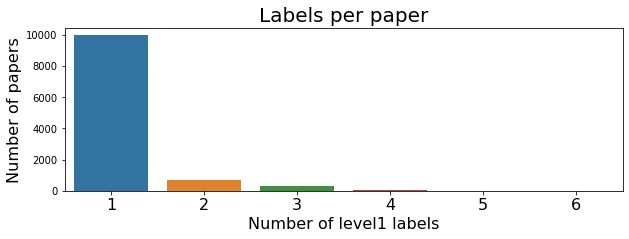

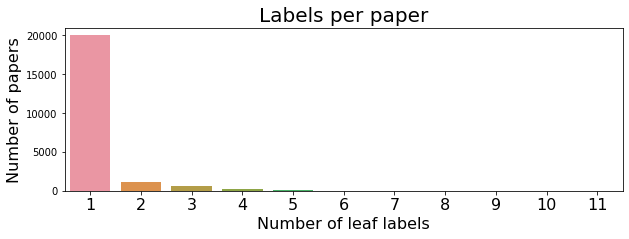

[3, 1, 1, 2, 1, 4, 2, 1, 1, 5, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 4, 1, 1, 1, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 2, 1, 2, 3, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 3, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 4, 1, 2, 1, 2, 1, 3, 2, 1, 1, 2, 2, 1, 1, 6, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 4, 1, 1, 5, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 3, 3, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 6, 1, 1, 1, 1, 2, 1, 4, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 3, 2, 5, 4, 3, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 4, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 3, 1, 2, 1, 3, 2, 1, 3, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 2, 2, 1, 1, 1, 1, 2, 7, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 3, 2, 4, 1, 1, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 

In [125]:
# Number of labels per paper
# https://colab.research.google.com/github/GokuMohandas/MLOps/blob/main/notebooks/tagifai.ipynb#scrollTo=NgMGuIQrNkSV

labels = tuple(lvl1_labels)
num_tags_per_project = [len(labels) for labels in df.level1]
num_tags, num_projects = zip(*Counter(num_tags_per_project).items())
plt.figure(figsize=(10, 3))
ax = sns.barplot(list(num_tags), list(num_projects))
plt.title("Labels per paper", fontsize=20)
plt.xlabel("Number of level1 labels", fontsize=16)
ax.set_xticklabels(range(1, len(num_tags)+1), rotation=0, fontsize=16)
plt.ylabel("Number of papers", fontsize=16)
plt.show()

labels = tuple(leaf_labels)
num_tags_per_project = [len(labels) for labels in df.level2] + [len(labels) for labels in df.level3]
num_tags, num_projects = zip(*Counter(num_tags_per_project).items())
plt.figure(figsize=(10, 3))
ax = sns.barplot(list(num_tags), list(num_projects))
plt.title("Labels per paper", fontsize=20)
plt.xlabel("Number of leaf labels", fontsize=16)
ax.set_xticklabels(range(1, len(num_tags)+1), rotation=0, fontsize=16)
plt.ylabel("Number of papers", fontsize=16)
plt.show()
print(num_tags_per_project)

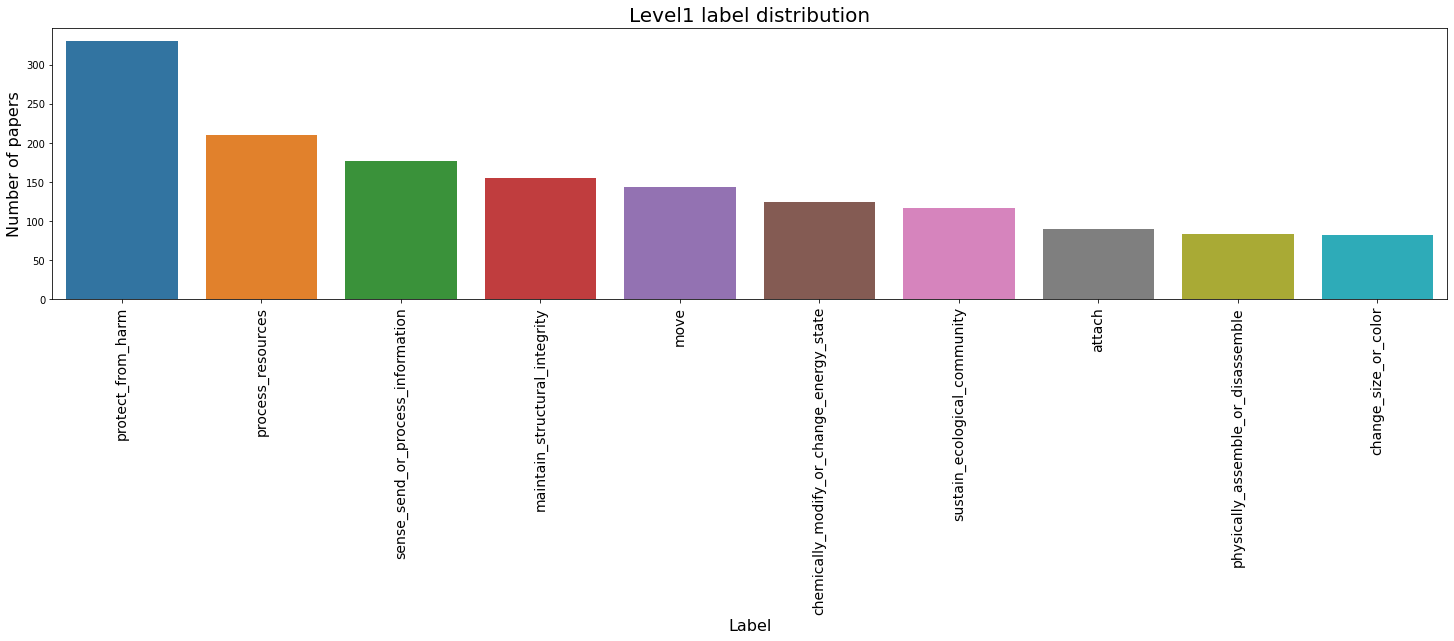

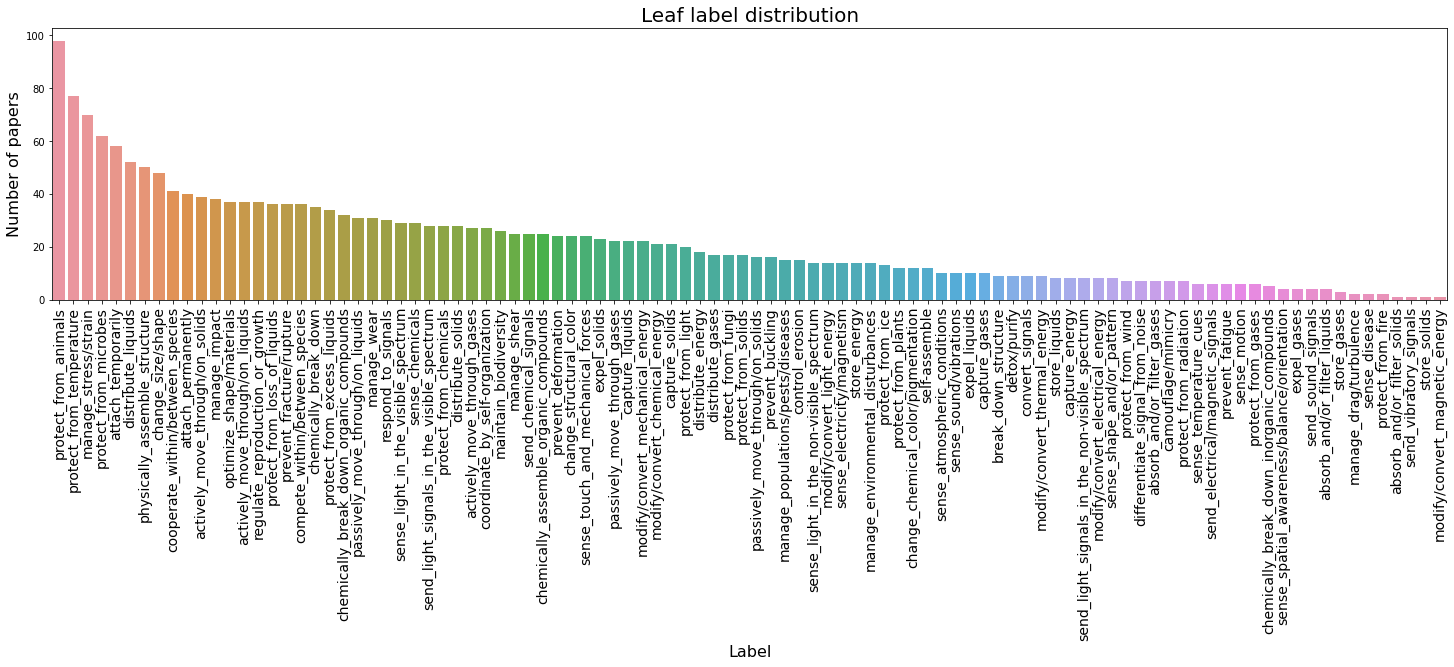

In [126]:
# Distribution of labels
# https://colab.research.google.com/github/GokuMohandas/MLOps/blob/main/notebooks/tagifai.ipynb#scrollTo=NgMGuIQrNkSV

import itertools

all_tags = list(itertools.chain.from_iterable(df.level1.values))
tags, tag_counts = zip(*Counter(all_tags).most_common())
plt.figure(figsize=(25, 5))
ax = sns.barplot(list(tags), list(tag_counts))
plt.title("Level1 label distribution", fontsize=20)
plt.xlabel("Label", fontsize=16)
ax.set_xticklabels(tags, rotation=90, fontsize=14)
plt.ylabel("Number of papers", fontsize=16)
plt.show()

all_tags = list(itertools.chain.from_iterable(df.level2.values)) + list(itertools.chain.from_iterable(df.level3.values))
all_tags = [x for x in all_tags if x in leaf_labels]
tags, tag_counts = zip(*Counter(all_tags).most_common())
plt.figure(figsize=(25, 5))
ax = sns.barplot(list(tags), list(tag_counts))
plt.title("Leaf label distribution", fontsize=20)
plt.xlabel("Label", fontsize=16)
ax.set_xticklabels(tags, rotation=90, fontsize=14)
plt.ylabel("Number of papers", fontsize=16)
plt.show()

In [127]:
# Drop all non-feature columns
non_feat = ['mag', 'venue_mag', 'author', 'reference', 'venue', 'level1', 'level2', 'level3', 'abstract_full', 'title_full', 'isBiomimicry']
df.drop(non_feat, axis=1, inplace=True)
df.head()

,physically_assemble_or_disassemble,sense_send_or_process_information,protect_from_harm,attach,maintain_structural_integrity,process_resources,move,sustain_ecological_community,chemically_modify_or_change_energy_state,change_size_or_color,y_lvl1,manage_shear,change_chemical_color/pigmentation,modify/convert_light_energy,sense_light_in_the_visible_spectrum,prevent_buckling,send_light_signals_in_the_visible_spectrum,respond_to_signals,capture_energy,store_energy,expel_liquids,coordinate_by_self-organization,send_electrical/magnetic_signals,sense_chemicals,sense_spatial_awareness/balance/orientation,protect_from_fire,break_down_structure,passively_move_through/on_liquids,absorb_and/or_filter_gases,convert_signals,passively_move_through_gases,sense_motion,passively_move_through/on_solids,maintain_biodiversity,sense_temperature_cues,chemically_break_down_inorganic_compounds,attach_temporarily,modify/convert_thermal_energy,modify/convert_chemical_energy,protect_from_fungi,...,cooperate_within/between_species,manage_impact,protect_from_excess_liquids,manage_environmental_disturbances,manage_populations/pests/diseases,sense_shape_and/or_pattern,protect_from_loss_of_liquids,distribute_liquids,manage_stress/strain,expel_solids,control_erosion,actively_move_through/on_liquids,expel_gases,send_sound_signals,actively_move_through/on_solids,protect_from_solids,capture_solids,chemically_assemble_organic_compounds,send_vibratory_signals,protect_from_light,store_liquids,sense_atmospheric_conditions,detox/purify,prevent_fracture/rupture,chemically_break_down,optimize_shape/materials,send_light_signals_in_the_non-visible_spectrum,protect_from_wind,manage_drag/turbulence,modify/convert_mechanical_energy,chemically_break_down_organic_compounds,change_size/shape,protect_from_microbes,prevent_deformation,protect_from_animals,sense_touch_and_mechanical_forces,camouflage/mimicry,y_leaves,text,text_raw
0,1,0,1,0,0,0,0,0,0,0,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0...",building a home from foam tungara frog foam nest architecture and three phase construction process ||||| frogs that build foam nests floating on w...,Building a home from foam—túngara frog foam nest architecture and three-phase construction process. Frogs that build foam nests floating on water ...
1,0,1,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",a nocturnal mammal the greater mouse eared bat calibrates a magnetic compass by the sun ||||| recent evidence suggests that bats can detect the ge...,"A nocturnal mammal, the greater mouse-eared bat, calibrates a magnetic compass by the sun. Recent evidence suggests that bats can detect the geoma..."
2,0,1,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",polarization sensitivity in two species of cuttlefish sepia plangon gray and sepia mestus gray demonstrated with polarized optomotor stimuli |||||...,Polarization sensitivity in two species of cuttlefish – Sepia plangon (Gray 1849) and Sepia mestus (Gray 1849) – demonstrated with polarized optom...
3,0,0,1,0,0,0,0,0,1,0,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [128]:
df_lvl1 = df.drop(leaf_labels + ['y_leaves'], axis=1)
df_lvl1 = df_lvl1.rename(columns={"y_lvl1": "y"})
df_lvl1

,physically_assemble_or_disassemble,sense_send_or_process_information,protect_from_harm,attach,maintain_structural_integrity,process_resources,move,sustain_ecological_community,chemically_modify_or_change_energy_state,change_size_or_color,y,text,text_raw
0,1,0,1,0,0,0,0,0,0,0,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]",building a home from foam tungara frog foam nest architecture and three phase construction process ||||| frogs that build foam nests floating on w...,Building a home from foam—túngara frog foam nest architecture and three-phase construction process. Frogs that build foam nests floating on water ...
1,0,1,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",a nocturnal mammal the greater mouse eared bat calibrates a magnetic compass by the sun ||||| recent evidence suggests that bats can detect the ge...,"A nocturnal mammal, the greater mouse-eared bat, calibrates a magnetic compass by the sun. Recent evidence suggests that bats can detect the geoma..."
2,0,1,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",polarization sensitivity in two species of cuttlefish sepia plangon gray and sepia mestus gray demonstrated with polarized optomotor stimuli |||||...,Polarization sensitivity in two species of cuttlefish – Sepia plangon (Gray 1849) and Sepia mestus (Gray 1849) – demonstrated with polarized optom...
3,0,0,1,0,0,0,0,0,1,0,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]",identification and characterization of a multidomain hyperthermophilic cellulase from an archaeal enrichment ||||| despite extensive studies on mi...,Identification and characterization of a multidomain hyperthermophilic cellulase from an archaeal enrichment.. Despite extensive studies on microb...
4,0,0,0,0,1,0,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",differences in polysaccharide structure between calcified and uncalcified segments in the coralline calliarthron cheilosporioides corallinales rho...,"DIFFERENCES IN POLYSACCHARIDE STRUCTURE BETWEEN CALCIFIED AND UNCALCIFIED SEGMENTS IN THE CORALLINE CALLIARTHRON CHEILOSPORIOIDES (CORALLINALES, R..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11078,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",the pheromones of laying workers in two honeybee sister species apis cerana and apis mellifera ||||| when a honeybee colony loses its queen worker...,"The pheromones of laying workers in two honeybee sister species: Apis cerana and Apis mellifera. When a honeybee colony loses its queen, workers a..."
11079,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",diversity and function of the avian gut microbiota ||||| the intestinal microbiota have now been shown to largely affect host health through vario...,Diversity and function of the avian gut microbiota. The intestinal microbiota have now been shown to largely affect host health through various fu...
11080,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",grasshopper calling songs convey information about condition and health of males ||||| females of the grasshopper chorthippus biguttulus invest mu...,Grasshopper calling songs convey information about condition and health of males. Females of the grasshopper Chorthippus biguttulus invest much mo...
11081,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",divergence of larval resource acquisition for water conservation and starvation resistance in drosophila melanogaster ||||| laboratory selection e...,Divergence of larval resource acquisition for water conservation and starvation resistance in Drosophila melanogaster. Laboratory selection experi...


In [129]:
df_leaves = df.drop(lvl1_labels + ['y_lvl1'], axis=1)
df_leaves = df_leaves.rename(columns={"y_leaves": "y"})
df_leaves

,manage_shear,change_chemical_color/pigmentation,modify/convert_light_energy,sense_light_in_the_visible_spectrum,prevent_buckling,send_light_signals_in_the_visible_spectrum,respond_to_signals,capture_energy,store_energy,expel_liquids,coordinate_by_self-organization,send_electrical/magnetic_signals,sense_chemicals,sense_spatial_awareness/balance/orientation,protect_from_fire,break_down_structure,passively_move_through/on_liquids,absorb_and/or_filter_gases,convert_signals,passively_move_through_gases,sense_motion,passively_move_through/on_solids,maintain_biodiversity,sense_temperature_cues,chemically_break_down_inorganic_compounds,attach_temporarily,modify/convert_thermal_energy,modify/convert_chemical_energy,protect_from_fungi,protect_from_gases,compete_within/between_species,prevent_fatigue,modify/convert_electrical_energy,protect_from_radiation,change_structural_color,actively_move_through_gases,sense_light_in_the_non-visible_spectrum,sense_sound/vibrations,capture_gases,protect_from_temperature,...,cooperate_within/between_species,manage_impact,protect_from_excess_liquids,manage_environmental_disturbances,manage_populations/pests/diseases,sense_shape_and/or_pattern,protect_from_loss_of_liquids,distribute_liquids,manage_stress/strain,expel_solids,control_erosion,actively_move_through/on_liquids,expel_gases,send_sound_signals,actively_move_through/on_solids,protect_from_solids,capture_solids,chemically_assemble_organic_compounds,send_vibratory_signals,protect_from_light,store_liquids,sense_atmospheric_conditions,detox/purify,prevent_fracture/rupture,chemically_break_down,optimize_shape/materials,send_light_signals_in_the_non-visible_spectrum,protect_from_wind,manage_drag/turbulence,modify/convert_mechanical_energy,chemically_break_down_organic_compounds,change_size/shape,protect_from_microbes,prevent_deformation,protect_from_animals,sense_touch_and_mechanical_forces,camouflage/mimicry,y,text,text_raw
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0...",building a home from foam tungara frog foam nest architecture and three phase construction process ||||| frogs that build foam nests floating on w...,Building a home from foam—túngara frog foam nest architecture and three-phase construction process. Frogs that build foam nests floating on water ...
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",a nocturnal mammal the greater mouse eared bat calibrates a magnetic compass by the sun ||||| recent evidence suggests that bats can detect the ge...,"A nocturnal mammal, the greater mouse-eared bat, calibrates a magnetic compass by the sun. Recent evidence suggests that bats can detect the geoma..."
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",polarization sensitivity in two species of cuttlefish sepia plangon gray and sepia mestus gray demonstrated with polarized optomotor stimuli |||||...,Polarization sensitivity in two species of cuttlefish – Sepia plangon (Gray 1849) and Sepia mestus (Gray 1849) – demonstrated with polarized optom...
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

data_prefix = '/content/gdrive/My Drive/petal-search-engine/data/'

Mounted at /content/gdrive


In [130]:
# Write out the cleaned data
df_lvl1.to_csv(data_prefix + 'cleaned.csv', index=False)
df_leaves.to_csv(data_prefix + 'cleaned_leaves.csv', index=False)

In [ ]:
# Create train, test, val splits

# Read in the cleaned data
df = pd.read_csv(data_prefix + 'cleaned.csv')

# convert array strings to actual arrays
from ast import literal_eval
df['y'] = df['y'].apply(literal_eval)
df.head()

,y,text
0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",building a home from foam tungara frog foam ne...
1,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",a nocturnal mammal the greater mouse eared bat...
2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",polarization sensitivity in two species of cut...
3,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0]",identification and characterization of a multi...
4,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",differences in polysaccharide structure betwee...


In [ ]:
from sklearn.model_selection import train_test_split

features = df.drop('y', axis=1)
labels = df['y']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [ ]:
# Write out data

X_train.to_csv(data_prefix + 'train_features.csv', index=False)
X_val.to_csv(data_prefix + 'val_features.csv', index=False)
X_test.to_csv(data_prefix + 'test_features.csv', index=False)

y_train.to_csv(data_prefix + 'train_labels.csv', index=False)
y_val.to_csv(data_prefix + 'val_labels.csv', index=False)
y_test.to_csv(data_prefix + 'test_labels.csv', index=False)